In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.formula.api as smf

In [2]:
# df = pd.read_csv('s3://olistdashdb/csv/olist_customers_dataset.csv')

GETTING THE DATA

In [63]:
from olistdash.data import Olist
data = Olist().get_data()

In [12]:
from olistdash.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

In [16]:
Order().get_training_data(with_distance_seller_customer=True).to_csv('orders_df.csv',index=False)

order_id  payment_value  \
0       b81ef226f3fe1789b1e8b2acac839d17          99.33   
1       a9810da82917af2d9aefd1278f1dcfa0          24.39   
2       25e8ea4e93396b6fa0d3dd708e76c1bd          65.71   
3       ba78997921bbcdc1373bb41e913ab953         107.78   
4       42fdf880ba16b47b59251dd489d4441a         128.45   
...                                  ...            ...   
103882  7b905861d7c825891d6347454ea7863f          96.80   
103883  32609bbb3dd69b3c066a6860554a77bf          47.77   
103884  b8b61059626efa996a60be9bb9320e10         369.54   
103885  28bbae6599b09d39ca406b747b6632b1         191.58   
103886  bfbd0f9bdef84302105ad712db648a6c            NaN   

       order_purchase_timestamp  
0           2018-04-25 22:01:49  
1           2018-06-26 11:01:38  
2           2017-12-12 11:19:55  
3           2017-12-06 12:04:06  
4           2018-05-21 13:59:17  
...                         ...  
103882      2017-08-18 09:45:35  
103883      2017-11-18 17:27:14  
103884      2018-08-07 23:26:13  
103885      2017-12-05 08:18:35  
103886      2016-09-15 12:16:38  

[103887 rows x 3 columns]

In [13]:
orders = data['orders']
orders.to_csv('orders.csv',index=False)

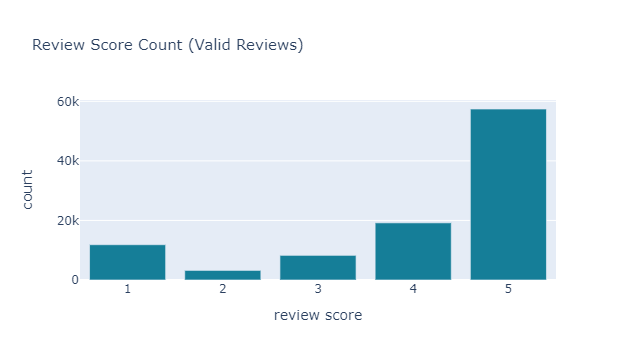

In [18]:
fig = go.Figure()
fig.add_trace(
        go.Bar(
            x=reviews['review_score'].value_counts().reset_index()['index'],
            y=reviews['review_score'].value_counts().reset_index()['review_score'],
            marker_color='#157E98'
        )
    )
fig.update_layout(
        title_text="Review Score Count (Valid Reviews)",
        title_font_size=15,
        # margin={
        #     "r": 30,
        #     "t": 30,
        #     "b": 30,
        #     "l": 30,
        # },
        )
fig.update_xaxes(title_text= 'review score')
fig.update_yaxes(title_text= 'count')
fig.show()

In [65]:
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
formula = "review_score ~ " + ' + '.join(features)
model4 = smf.ols(formula=formula, data=orders_standardized).fit()

In [66]:
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score

In [67]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5

In [68]:
pd.DataFrame(residuals)

0
0      0.295784
1      0.184043
2     -0.667432
3     -0.625966
4     -0.439598
...         ...
96528 -0.685274
96529 -0.277952
96530 -1.312224
96531  1.710528
96532 -0.565040

[96525 rows x 1 columns]

In [69]:
residuals

0        0.295784
1        0.184043
2       -0.667432
3       -0.625966
4       -0.439598
           ...   
96528   -0.685274
96529   -0.277952
96530   -1.312224
96531    1.710528
96532   -0.565040
Length: 96525, dtype: float64

In [73]:
# pd.DataFrame(residuals).reset_index()[0]

In [74]:
# fig = px.histogram(
#     x=pd.DataFrame(residuals).reset_index()[0],
#     y=pd.DataFrame(residuals).reset_index()['index'],
#     histnorm='probability density',
#     histfunc='count'

# )
# fig.show()

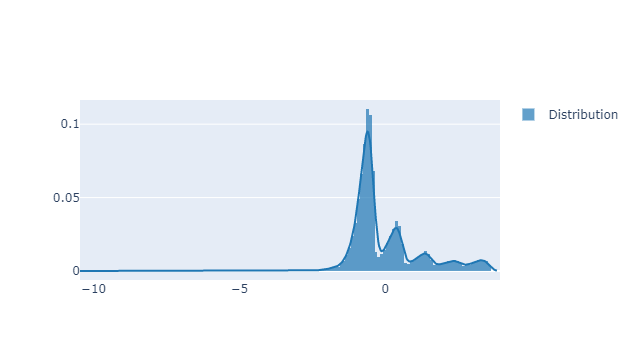

In [76]:
import plotly.figure_factory as ff
group_labels=['Distribution']
fig = ff.create_distplot([residuals], group_labels, bin_size=.1, show_rug=False, histnorm='probability',)
fig.show()

In [46]:
orders_standardized.review_score

0        4
1        4
2        5
3        5
4        5
        ..
96528    5
96529    4
96530    5
96531    2
96532    5
Name: review_score, Length: 96525, dtype: int64

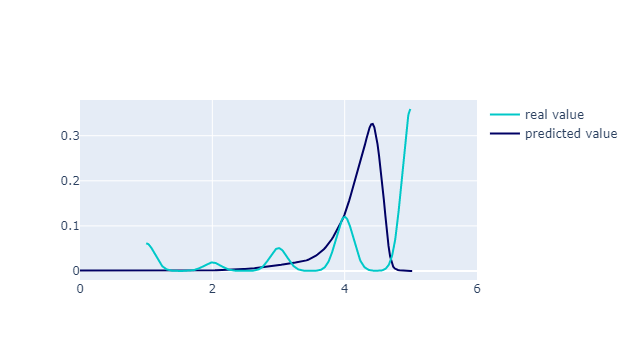

In [81]:
x1=predicted_review_score
x2=orders.review_score

group_labels=['predicted value','real value']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
# Create distplot with custom bin_size
fig = ff.create_distplot(
    [x1, x2],
    group_labels,
    show_hist=False,
    bin_size=.2,
    show_rug=False,
    colors=colors,
    histnorm='probability',
    
    
)
fig.update_layout(
    xaxis={
    # "autorange": True,
        "range": [
            "0",
            "6",
        ],
    }
    )
fig.show()

In [32]:
residuals.mean()

-1.1213214592371359e-14

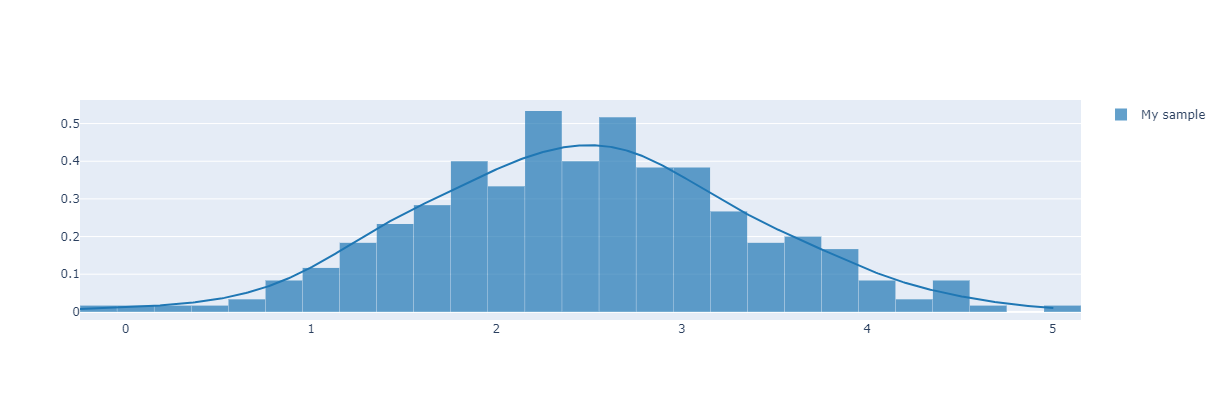

In [12]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(123)
x = np.random.normal(loc=2.5, scale=0.85, size=300) 
group_labels = 'My sample'

# Create distplot with custom bin_size, and without rug plot
fig = ff.create_distplot([x], [group_labels], bin_size=.2, show_rug=False)
fig.update_layout(width=600, 
                  height=400,
                  bargap=0.01)